In [1942]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

np.random.seed(0)

In [1943]:
# para gerar o grafico no browser
%matplotlib inline

In [1944]:
# local dos dados e modifica o diretorio
# path='/content/dados.csv'
# os.chdir(path)

In [1945]:
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/My Drive/ANN/Trabalho_01/
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ANN/Trabalho_01
dados.csv  Trabalho_ANN_01_Greg.ipynb


In [1946]:
# leitura dos dados
DAT=pd.read_csv("dados.csv", sep=';')
print(DAT)


    Run  Time     v   Co  pH  efficiency
0     1    60  0.12  100   7       95.80
1     2    40  0.18  100   7       85.70
2     3    60  0.18   50   3       95.38
3     4    40  0.12  100   3       85.20
4     5    40  0.12  100   7       86.40
5     6    20  0.06   50  11       94.10
6     7    20  0.06   50   3       91.69
7     8    60  0.06   50   3       93.24
8     9    20  0.18  150  11       55.10
9    10    20  0.18   50   3       57.80
10   11    60  0.06  150   3       94.20
11   12    40  0.12  150   7       80.88
12   13    20  0.06  150   3       62.42
13   14    60  0.06  150  11       93.80
14   15    40  0.12  100   7       92.60
15   16    40  0.06  100   7       91.34
16   17    40  0.12  100   7       92.40
17   18    60  0.06   50  11       94.20
18   19    40  0.12  100   7       93.10
19   20    20  0.18   50  11       84.00
20   21    40  0.12  100   7       91.20
21   22    60  0.18  150  11       92.90
22   23    40  0.12  100  11       93.10
23   24    60  0

In [1947]:
# separa as colunas de interesse
Index=[1,2,3,4,5]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
#print(Dat_Select)

In [1948]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=min_x
        b=max_x
        x[i]=(x[i]-a)/(b-a)
    return x

In [1949]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=min_x
        b=max_x
        x[i]=x[i]*(b-a)+a
    return x

In [1950]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)

In [1951]:
# separa os dados em treino e teste
train=DAT.sample(frac=0.8,random_state=None) # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index)
print(DAT)

    Time    v   Co   pH  efficiency
0    1.0  0.5  0.5  0.5    0.964497
1    0.5  1.0  0.5  0.5    0.815089
2    1.0  1.0  0.0  0.0    0.958284
3    0.5  0.5  0.5  0.0    0.807692
4    0.5  0.5  0.5  0.5    0.825444
5    0.0  0.0  0.0  1.0    0.939349
6    0.0  0.0  0.0  0.0    0.903698
7    1.0  0.0  0.0  0.0    0.926627
8    0.0  1.0  1.0  1.0    0.362426
9    0.0  1.0  0.0  0.0    0.402367
10   1.0  0.0  1.0  0.0    0.940828
11   0.5  0.5  1.0  0.5    0.743787
12   0.0  0.0  1.0  0.0    0.470710
13   1.0  0.0  1.0  1.0    0.934911
14   0.5  0.5  0.5  0.5    0.917160
15   0.5  0.0  0.5  0.5    0.898521
16   0.5  0.5  0.5  0.5    0.914201
17   1.0  0.0  0.0  1.0    0.940828
18   0.5  0.5  0.5  0.5    0.924556
19   0.0  1.0  0.0  1.0    0.789941
20   0.5  0.5  0.5  0.5    0.896450
21   1.0  1.0  1.0  1.0    0.921598
22   0.5  0.5  0.5  1.0    0.924556
23   1.0  1.0  0.0  1.0    1.000000
24   0.0  0.5  0.5  0.5    0.625740
25   0.5  0.5  0.5  0.5    0.930473
26   1.0  1.0  1.0  0.0    0

In [1952]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[0,1,2,3]]
x_test=test.iloc[:,[0,1,2,3]]
X_OLD=DAT_OLD.iloc[:,[0,1,2,3]]
print(x_train)

    Time    v   Co   pH
2    1.0  1.0  0.0  0.0
28   0.0  0.0  1.0  1.0
13   1.0  0.0  1.0  1.0
10   1.0  0.0  1.0  0.0
26   1.0  1.0  1.0  0.0
24   0.0  0.5  0.5  0.5
27   0.5  0.5  0.0  0.5
11   0.5  0.5  1.0  0.5
17   1.0  0.0  0.0  1.0
22   0.5  0.5  0.5  1.0
5    0.0  0.0  0.0  1.0
16   0.5  0.5  0.5  0.5
8    0.0  1.0  1.0  1.0
14   0.5  0.5  0.5  0.5
23   1.0  1.0  0.0  1.0
20   0.5  0.5  0.5  0.5
1    0.5  1.0  0.5  0.5
29   0.0  1.0  1.0  0.0
6    0.0  0.0  0.0  0.0
4    0.5  0.5  0.5  0.5
18   0.5  0.5  0.5  0.5
19   0.0  1.0  0.0  1.0
9    0.0  1.0  0.0  0.0
7    1.0  0.0  0.0  0.0


In [1953]:
# obtem as variaveis dependentes (treino e teste)
y_train=train.iloc[:,[4]]
y_test=test.iloc[:,[4]]
Y_OLD=DAT_OLD.iloc[:,[4]]
print(y_train)

    efficiency
2     0.958284
28    0.486686
13    0.934911
10    0.940828
26    0.882988
24    0.625740
27    0.948225
11    0.743787
17    0.940828
22    0.924556
5     0.939349
16    0.914201
8     0.362426
14    0.917160
23    1.000000
20    0.896450
1     0.815089
29    0.000000
6     0.903698
4     0.825444
18    0.924556
19    0.789941
9     0.402367
7     0.926627


In [1954]:
# define a rede neural 
clf = MLPRegressor(solver='lbfgs',activation='logistic',alpha=0.00001,hidden_layer_sizes=(6,),learning_rate='constant', random_state=None)

In [1955]:
# treina a rede neural
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(6,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [1956]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)

In [1957]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [1958]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)

In [1959]:
# recupera os dados originais 
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)

In [1960]:
# escolhe uma das resposta para fazer o grafico (efficiency-treino)
effici_obs_train=[]
effici_calc_train=[]
effici_calc_train=y_calc_train['efficiency'].copy()
effici_obs_train=train['efficiency'].copy()

In [1961]:
# escolhe uma das resposta para fazer o grafico (efficiency-teste)
effici_obs_test=[]
effici_calc_test=[]
effici_calc_test=y_calc_test['efficiency'].copy()
effici_obs_test=test['efficiency'].copy()

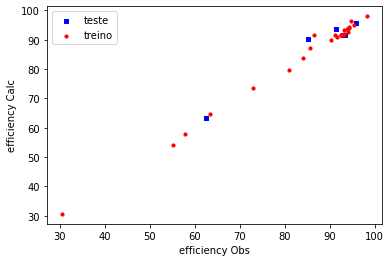

In [1962]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(effici_obs_test,effici_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(effici_obs_train,effici_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('efficiency Calc')
plt.xlabel('efficiency Obs')
plt.show()

In [1963]:
mse=mean_squared_error(effici_obs_test,effici_calc_test)
print("MSE teste=",mse)
R2=r2_score(effici_obs_test,effici_calc_test)
print("R^2 teste=",R2)

MSE teste= 5.9988066797662585
R^2 teste= 0.953892833727802


In [1964]:
mse=mean_squared_error(effici_obs_train,effici_calc_train)
print("MSE treino=",mse)
R2=r2_score(effici_obs_train,effici_calc_train)
print("R^2 treino=",R2)

MSE treino= 1.8895197576331675
R^2 treino= 0.9928387512262393
